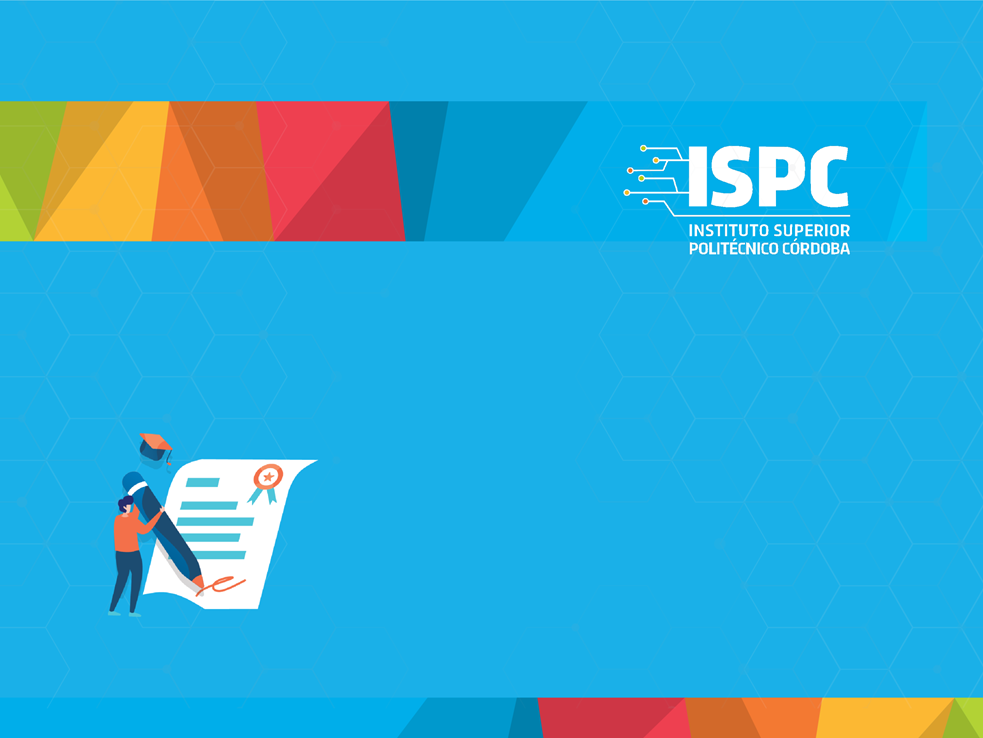

# Regresión Logística vs Arbol de Decision

# VERRR

https://www.geeksforgeeks.org/basic-concept-classification-data-mining/?ref=lbp

In [ ]:
# TEST

https://towardsdatascience.com/when-logistic-regression-simply-doesnt-work-8cd8f2f9d997

In [1]:
import pandas as pd
import numpy as np

size = 20

X = pd.DataFrame()
X['temprature_outside'] = np.random.randint(10,40, size = size)
X['air_conditioning'] = np.random.randint(0,2, size=size)

y = X.apply(lambda row: 
            row['temprature_outside'] + 10* row['air_conditioning'] 
            if row['temprature_outside'] < 25 
            else row['temprature_outside'] - 10* row['air_conditioning'], axis=1)

y1 = ['Hot' if v > 25 else 'Cold' for v in y]

In [2]:
X.head(20)

,temprature_outside,air_conditioning
0,33,1
1,35,1
2,34,1
3,36,1
4,25,0
5,39,1
6,32,1
7,36,1
8,38,0
9,21,1


In [3]:
y

0     23
1     25
2     24
3     26
4     25
5     29
6     22
7     26
8     38
9     31
10    19
11    34
12    32
13    29
14    23
15    37
16    19
17    24
18    17
19    28
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

In [6]:
pd.DataFrame({'temprature_outside': X_test['temprature_outside'], 
              'air_conditioning': X_test['air_conditioning'], 
              'Ground Truth': y_test, 
              'Prediction': clf.predict(X_test)})[:10]

,temprature_outside,air_conditioning,Ground Truth,Prediction
0,33,1,Cold,Hot
17,14,1,Cold,Cold
15,37,0,Hot,Hot
1,35,1,Cold,Hot


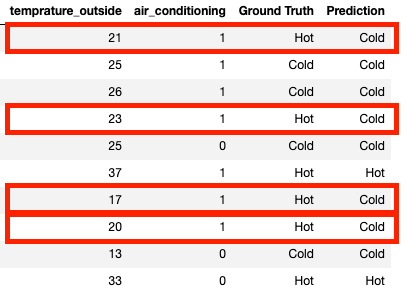

In [7]:
clf.score(X_test, y_test)

0.5

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

In [9]:
pd.DataFrame({'temprature_outside': X_test['temprature_outside'], 
              'air_conditioning': X_test['air_conditioning'], 
              'Ground Truth': y_test, 
              'Prediction': clf.predict(X_test)})[:10]

,temprature_outside,air_conditioning,Ground Truth,Prediction
0,33,1,Cold,Cold
17,14,1,Cold,Cold
15,37,0,Hot,Hot
1,35,1,Cold,Cold


In [10]:
clf.score(X_test, y_test)

1.0

[Text(581.25, 815.4, 'temprature_outside <= 35.0\ngini = 0.492\nsamples = 100.0%\nvalue = [0.438, 0.562]\nclass = Hot'),
 Text(465.0, 634.2, 'temprature_outside <= 24.5\ngini = 0.463\nsamples = 68.8%\nvalue = [0.636, 0.364]\nclass = Cold'),
 Text(232.5, 453.0, 'temprature_outside <= 15.5\ngini = 0.375\nsamples = 25.0%\nvalue = [0.25, 0.75]\nclass = Hot'),
 Text(116.25, 271.80000000000007, 'gini = 0.0\nsamples = 6.2%\nvalue = [1.0, 0.0]\nclass = Cold'),
 Text(348.75, 271.80000000000007, 'gini = 0.0\nsamples = 18.8%\nvalue = [0.0, 1.0]\nclass = Hot'),
 Text(697.5, 453.0, 'air_conditioning <= 0.5\ngini = 0.245\nsamples = 43.8%\nvalue = [0.857, 0.143]\nclass = Cold'),
 Text(581.25, 271.80000000000007, 'temprature_outside <= 28.5\ngini = 0.5\nsamples = 12.5%\nvalue = [0.5, 0.5]\nclass = Cold'),
 Text(465.0, 90.60000000000002, 'gini = 0.0\nsamples = 6.2%\nvalue = [1.0, 0.0]\nclass = Cold'),
 Text(697.5, 90.60000000000002, 'gini = 0.0\nsamples = 6.2%\nvalue = [0.0, 1.0]\nclass = Hot'),
 Text(

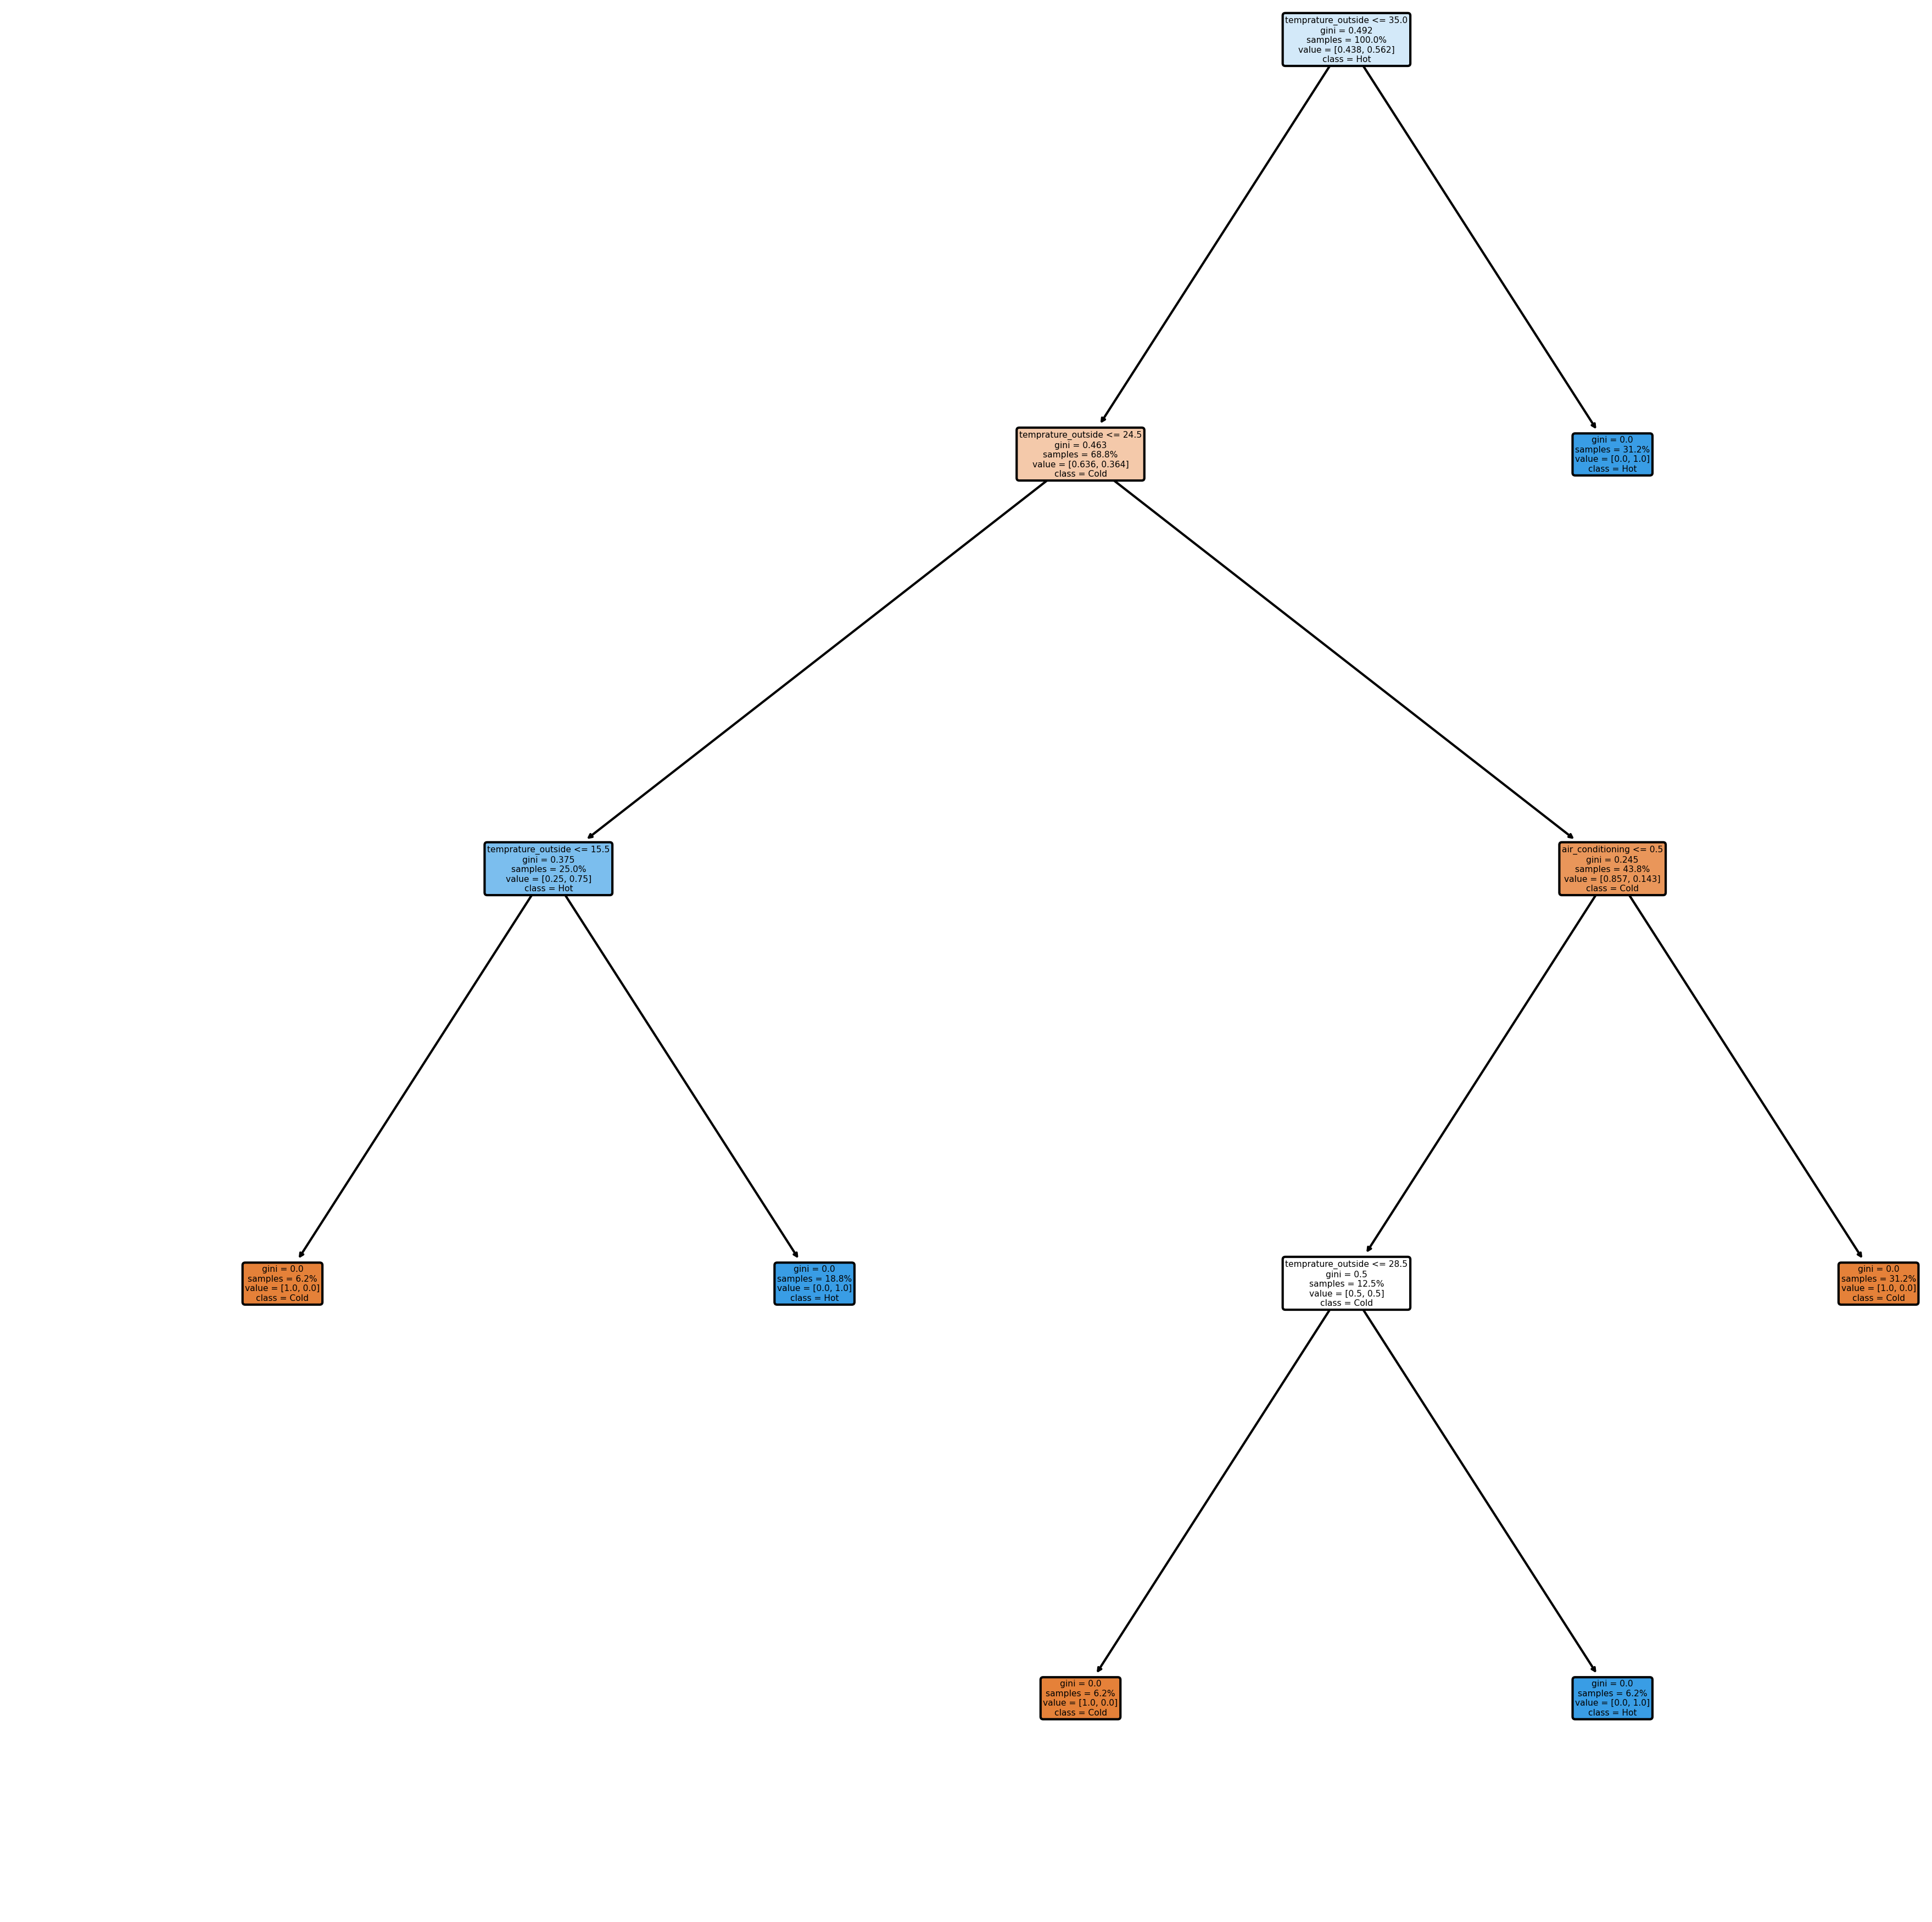

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf, ax= ax, feature_names = X_train.columns, 
               class_names=clf.classes_, filled = True, 
               proportion = True, rounded=True)

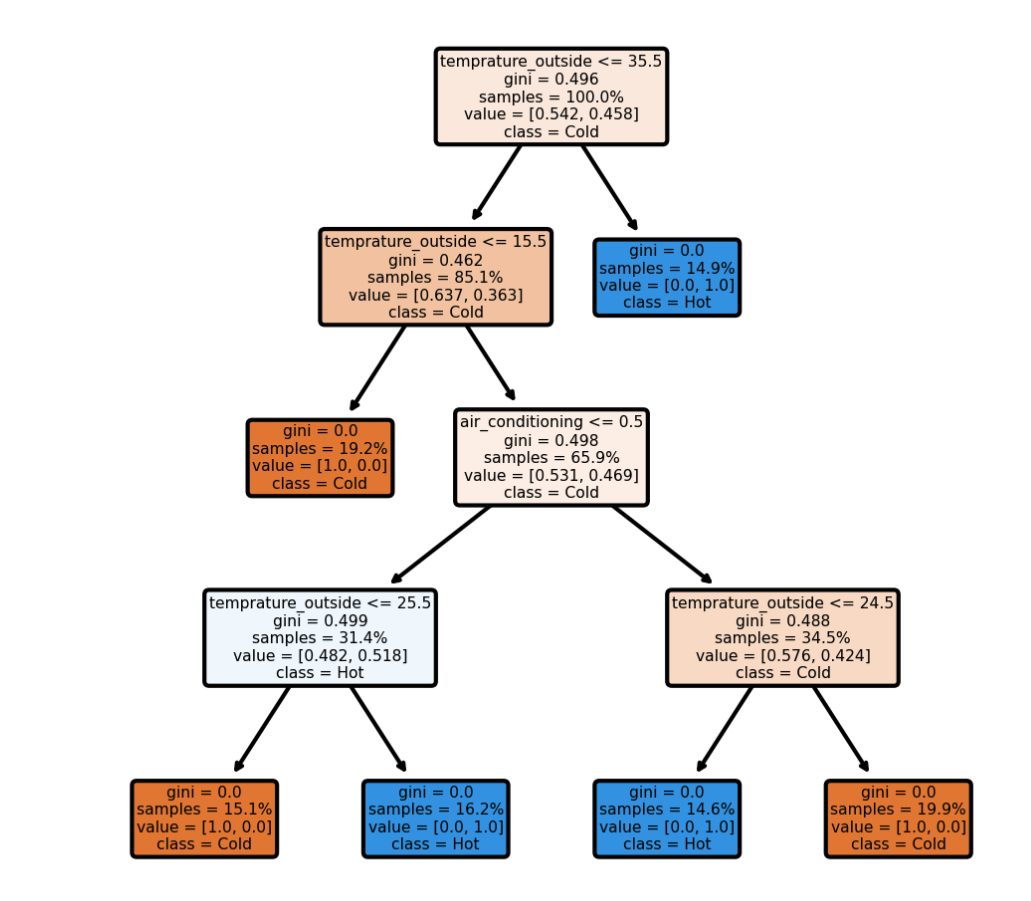

In [ ]:
X['is_heating'] = (X['temprature_outside']<25).astype(int)*X['air_conditioning']
X['is_cooling'] = (X['temprature_outside']>=25).astype(int)*X['air_conditioning']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)